The purpose of this exercise is to analyze [the political books network](http://www-personal.umich.edu/~mejn/netdata)

L. A. Adamic and N. Glance, "The political blogosphere and the 2004 US Election", in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem (2005).


In [4]:
import networkx as nx
from networkx.algorithms import community
import pandas as pd
%matplotlib inline


In [5]:
# Read the network data
net = nx.read_gml('data/polbooks.gml')

In [6]:
net.nodes

NodeView(('1000 Years for Revenge', 'Bush vs. the Beltway', "Charlie Wilson's War", 'Losing Bin Laden', 'Sleeping With the Devil', 'The Man Who Warned America', 'Why America Slept', 'Ghost Wars', 'A National Party No More', 'Bush Country', 'Dereliction of Duty', 'Legacy', 'Off with Their Heads', 'Persecution', "Rumsfeld's War", 'Breakdown', 'Betrayal', 'Shut Up and Sing', 'Meant To Be', 'The Right Man', 'Ten Minutes from Normal', "Hillary's Scheme", 'The French Betrayal of America', 'Tales from the Left Coast', 'Hating America', 'The Third Terrorist', 'Endgame', 'Spin Sisters', "All the Shah's Men", 'Dangerous Dimplomacy', 'The Price of Loyalty', 'House of Bush, House of Saud', 'The Death of Right and Wrong', 'Useful Idiots', "The O'Reilly Factor", 'Let Freedom Ring', 'Those Who Trespass', 'Bias', 'Slander', 'The Savage Nation', 'Deliver Us from Evil', 'Give Me a Break', 'The Enemy Within', 'The Real America', "Who's Looking Out for You?", 'The Official Handbook Vast Right Wing Conspir

In [7]:
net.edges

EdgeView([('1000 Years for Revenge', 'Bush vs. the Beltway'), ('1000 Years for Revenge', "Charlie Wilson's War"), ('1000 Years for Revenge', 'Losing Bin Laden'), ('1000 Years for Revenge', 'Sleeping With the Devil'), ('1000 Years for Revenge', 'The Man Who Warned America'), ('1000 Years for Revenge', 'Why America Slept'), ('Bush vs. the Beltway', 'Losing Bin Laden'), ('Bush vs. the Beltway', 'The Man Who Warned America'), ('Bush vs. the Beltway', 'Why America Slept'), ("Charlie Wilson's War", 'Sleeping With the Devil'), ("Charlie Wilson's War", 'The Man Who Warned America'), ("Charlie Wilson's War", 'Ghost Wars'), ('Losing Bin Laden', 'The Man Who Warned America'), ('Losing Bin Laden', 'A National Party No More'), ('Losing Bin Laden', 'Bush Country'), ('Losing Bin Laden', 'Dereliction of Duty'), ('Losing Bin Laden', 'Legacy'), ('Losing Bin Laden', 'Off with Their Heads'), ('Losing Bin Laden', 'Persecution'), ('Losing Bin Laden', "Rumsfeld's War"), ('Losing Bin Laden', 'Breakdown'), ('L

# What books are purchased with `Worse Than Watergate`?

In [8]:
net['Worse Than Watergate']

AtlasView({'The Price of Loyalty': {}, 'House of Bush, House of Saud': {}, 'The Sorrows of Empire': {}, 'Against All Enemies': {}, 'American Dynasty': {}, 'Big Lies': {}, 'The Lies of George W. Bush': {}, 'Plan of Attack': {}, 'Bush at War': {}, 'The New Pearl Harbor': {}, 'Bushwomen': {}, 'The Politics of Truth': {}, 'Fanatics and Fools': {}, 'Bushwhacked': {}, 'The Exception to the Rulers': {}, 'Freethinkers': {}})

In [10]:
list(net.neighbors("Worse Than Watergate"))

['The Price of Loyalty',
 'House of Bush, House of Saud',
 'The Sorrows of Empire',
 'Against All Enemies',
 'American Dynasty',
 'Big Lies',
 'The Lies of George W. Bush',
 'Plan of Attack',
 'Bush at War',
 'The New Pearl Harbor',
 'Bushwomen',
 'The Politics of Truth',
 'Fanatics and Fools',
 'Bushwhacked',
 'The Exception to the Rulers',
 'Freethinkers']

# What is the shortest path between `MoveOn's 50 Ways to Love Your Country` and `Empire`?

In [11]:
nx.shortest_path(net, "MoveOn's 50 Ways to Love Your Country", 'Empire')

["MoveOn's 50 Ways to Love Your Country",
 'American Dynasty',
 'The Great Unraveling',
 'Rogue Nation',
 'Empire']

# What are the top 5 central books? Use different centrality measures and compare

In [15]:
pd.Series(nx.degree_centrality(net)).sort_values(ascending=False).head()

A National Party No More    0.240385
Off with Their Heads        0.240385
Losing Bin Laden            0.221154
Bushwhacked                 0.221154
American Dynasty            0.211538
dtype: float64

In [16]:
pd.Series(nx.betweenness_centrality(net)).sort_values(ascending=False).head()

The Price of Loyalty    0.139478
The Bushes              0.103649
Bush Country            0.098395
Off with Their Heads    0.095262
American Dynasty        0.090934
dtype: float64

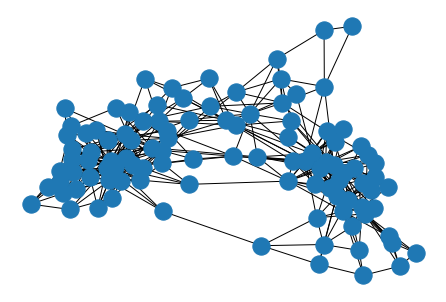

In [17]:
nx.draw(net)

# Using community detection, uncover communities from the network, what do they mean?

In [18]:
communities = community.greedy_modularity_communities(net)

In [20]:
len(communities)

4

In [21]:
communities[0]

frozenset({'1000 Years for Revenge',
           'A National Party No More',
           'Arrogance',
           'Betrayal',
           'Bias',
           'Breakdown',
           'Bush Country',
           'Bush vs. the Beltway',
           "Charlie Wilson's War",
           'Dangerous Dimplomacy',
           'Deliver Us from Evil',
           'Dereliction of Duty',
           'Endgame',
           'Fighting Back',
           'Ghost Wars',
           'Give Me a Break',
           'Hating America',
           "Hillary's Scheme",
           'Hollywood Interrupted',
           'Legacy',
           'Let Freedom Ring',
           'Losing Bin Laden',
           'Meant To Be',
           'Off with Their Heads',
           'Persecution',
           'Power Plays',
           "Rumsfeld's War",
           'Shut Up and Sing',
           'Slander',
           'Sleeping With the Devil',
           'Spin Sisters',
           'Tales from the Left Coast',
           'Ten Minutes from Normal',
           

In [23]:
communities[1]

frozenset({'Against All Enemies',
           "All the Shah's Men",
           'American Dynasty',
           'Big Lies',
           'Buck Up Suck Up',
           'Bush at War',
           'Bushwhacked',
           'Bushwomen',
           'Downsize This!',
           "Dude, Where's My Country?",
           'Fanatics and Fools',
           'Freethinkers',
           'Had Enough?',
           'Hegemony or Survival',
           'House of Bush, House of Saud',
           "It's Still the Economy, Stupid!",
           'Lies and the Lying Liars Who Tell Them',
           'Living History',
           "MoveOn's 50 Ways to Love Your Country",
           'Perfectly Legal',
           'Plan of Attack',
           'Rush Limbaugh Is a Big Fat Idiot',
           'Shrub',
           'Stupid White Men',
           'The Best Democracy Money Can Buy',
           'The Bubble of American Supremacy',
           'The Buying of the President 2004',
           'The Clinton Wars',
           'The Culture of Fear

In [24]:
communities[2]

frozenset({'Allies',
           'America Unbound',
           'Colossus',
           'Disarming Iraq',
           'Empire',
           'Rise of the Vulcans',
           'Rogue Nation',
           'Soft Power',
           'Surprise, Security, the American Experience',
           'The Choice',
           'The Future of Freedom',
           'Things Worth Fighting For'})

In [25]:
communities[3]

frozenset({'The Bushes', 'The Faith of George W Bush', 'The Perfect Wife'})

In [28]:
book_community = {book:i for i in range(len(communities)) for book in communities[i]}

In [32]:
book_color = [ ["red", "blue", "yellow", "green"][book_community[book]
                                ] for book in net.nodes()  ]

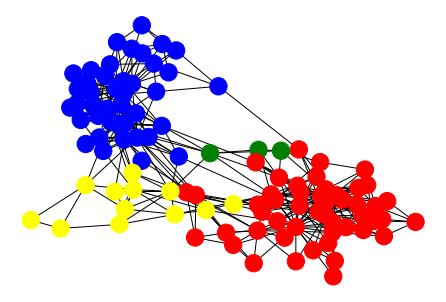

In [37]:
nx.draw(net, node_color = book_color)